In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import os
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [434]:
mypath = os.getcwd() + "\\csv files\\"

In [435]:
filenames = next(os.walk(mypath), (None, None, []))[2]  # [] if no file
filenames

['anual_growth_gdp_constant_us2010.csv',
 'empleo informal.csv',
 'ganancias promedio por ocupacion.csv',
 'manufactoring employment.csv',
 'modern_slavery.csv',
 'national compliance with labour rights.csv',
 'occupational_injuries.csv',
 'social_protection.csv',
 'unemployment.csv',
 'working_poverty_rate.csv',
 'youth15-24_unemployment.csv']

In [436]:
df_1 = pd.read_csv(mypath + filenames[0], header=0, sep=",", usecols = ["ref_area.label","time","obs_value"])
df_1 = df_1.rename(columns={"obs_value": "gdp_growth","ref_area.label":"country"})
df_2 = pd.read_csv(mypath + filenames[1], header=0, sep=",")#, usecols = ["ref_area.label","time","obs_value"])
df_2 = df_2.rename(columns={"Country":"country","Total":"Total_informal"})
df_3 = pd.read_csv(mypath + filenames[2], header=0, sep=",")
df_3 = df_3.rename(columns={"Country":"country","Total":"Total_ocupacion"})
df_4 = pd.read_csv(mypath + filenames[3], header=0, sep=",", usecols = ["ref_area.label","time","obs_value"])
df_4 = df_4.rename(columns={"obs_value": "manufactoring_employment","ref_area.label":"country"})

df_6 = pd.read_csv(mypath + filenames[5], header=0, sep=",")
df_7 = pd.read_csv(mypath + filenames[6], header=0, sep=",")
df_7 = df_7.rename(columns={"Country":"country","Total":"nonletal_injuries"})
df_8 = pd.read_csv(mypath + filenames[7], header=0, sep=",")
df_8 = df_8.rename(columns={"Country":"country"})
df_9 = pd.read_csv(mypath + filenames[8], header=0, sep=",")
df_10 = pd.read_csv(mypath + filenames[9], header=0, sep=",")
df_11 = pd.read_csv(mypath + filenames[10], header=0, sep=",")

In [438]:
df_slavery = pd.read_csv(mypath + filenames[4], header=0, sep=",")
df_slavery = df_slavery.rename(columns={"Country ": "country"})
df_slavery = df_slavery.replace("Bolivia, Plurinational State of", "Bolivia")
df.dropna(subset = ['Est. prevalence of population in modern slavery (victims per 1,000 population)'],inplace=True)
df_slavery.drop(['Est. number of people in modern slavery','Support survivors','Criminal justice','Coordination','Address risk','Supply chains','SUM/104', 'SUM Neg'],axis=1,inplace=True)
df_slavery = df_slavery.rename(columns={'%':'Support survivors','%.1':'Criminal justice','%.2':'Coordination','%.3':'Address risk','%.4':'Supply chains'})

In [442]:
df = pd.merge(df_slavery, df_1.loc[df_1["time"]==2018], on='country', how='left').drop("time",axis=1)

df_tmp = df_2.loc[df_2["Year"].isin([2016,2017,2018])].copy()
df_tmp = df_tmp.groupby("country").agg({"Agriculture":"median","Non-agriculture":"median","Total_informal":"median"})
df = pd.merge(df, df_tmp, on='country', how='left')

df_tmp = df_3.loc[df_3["Year"].isin([2016,2017,2018])].copy()
df_tmp.drop(["0. Armed forces occupations","X. Not elsewhere classified"],axis=1,inplace=True)
df_tmp.dropna(inplace=True)
df_tmp = df_tmp.groupby("country").median().drop("Year",axis=1)
df = pd.merge(df, df_tmp, on='country', how='left')

df_tmp = df_4.loc[df_4["time"].isin([2019, 2018, 2017])].copy()
df_tmp = df_tmp.groupby("country").median().drop("time",axis=1)
df = pd.merge(df, df_tmp, on='country', how='left')

df_tmp = df_6.loc[df_6["time"].isin([2019,2018, 2017])].copy()
df_tmp = df_tmp.groupby("country").median().drop("time",axis=1)
df = pd.merge(df, df_tmp, on='country', how='left')

df_tmp = df_7[["country","nonletal_injuries","Year"]].loc[df_7["Year"].isin([2019, 2018, 2017, 2016])].copy()
df_tmp = df_tmp.groupby("country").median().drop("Year",axis=1)
df = pd.merge(df, df_tmp, on='country', how='left')

df_tmp = df_8.loc[df_8["Year"].isin([2020, 2019, 2018, 2017,2016])].copy()
df_tmp = df_tmp.groupby("country").median().drop(["Year","Mothers with newborns receiving maternity benefits"],axis=1)
df = pd.merge(df, df_tmp, on='country', how='left')

df_tmp = df_9.loc[df_9["time"].isin([2018, 2017, 2016])].copy()
df_tmp = df_tmp.groupby("country").median().drop("time",axis=1)
df = pd.merge(df, df_tmp, on='country', how='left')

df_tmp = df_10.loc[df_10["time"].isin([2018, 2017, 2016])].copy()
df_tmp = df_tmp.groupby("country").median().drop("time",axis=1)
df = pd.merge(df, df_tmp, on='country', how='left')

df_tmp = df_11.loc[df_11["time"].isin([2018, 2017, 2016])].copy()
df_tmp = df_tmp.groupby("country").median().drop("time",axis=1)
df = pd.merge(df, df_tmp, on='country', how='left')

In [446]:
df.columns

Index(['country', 'Population', 'Region',
       'Est. prevalence of population in modern slavery (victims per 1,000 population)',
       'Factor One Governance Issues ', 'Factor Two Nourishment and Access ',
       'Factor Three Inequality', 'Factor Four Disenfranchised Groups',
       'Factor Five Effects of Conflict',
       'Final overall (normalised, weighted) vulnerability score',
       'Support survivors', 'Criminal justice', 'Coordination',
       'NEG Government  complicity (1.4.3)',
       'NEG State-imposed forced labour (1.8.1)', 'Address risk',
       'Supply chains', 'TOTAL', 'Credit rating', 'gdp_growth', 'Agriculture',
       'Non-agriculture', 'Total_informal', '1. Managers', '2. Professionals',
       '3. Technicians and associate professionals',
       '4. Clerical support workers', '5. Service and sales workers',
       '6. Skilled agricultural, forestry and fishery workers',
       '7. Craft and related trades workers',
       '8. Plant and machine operators, and 

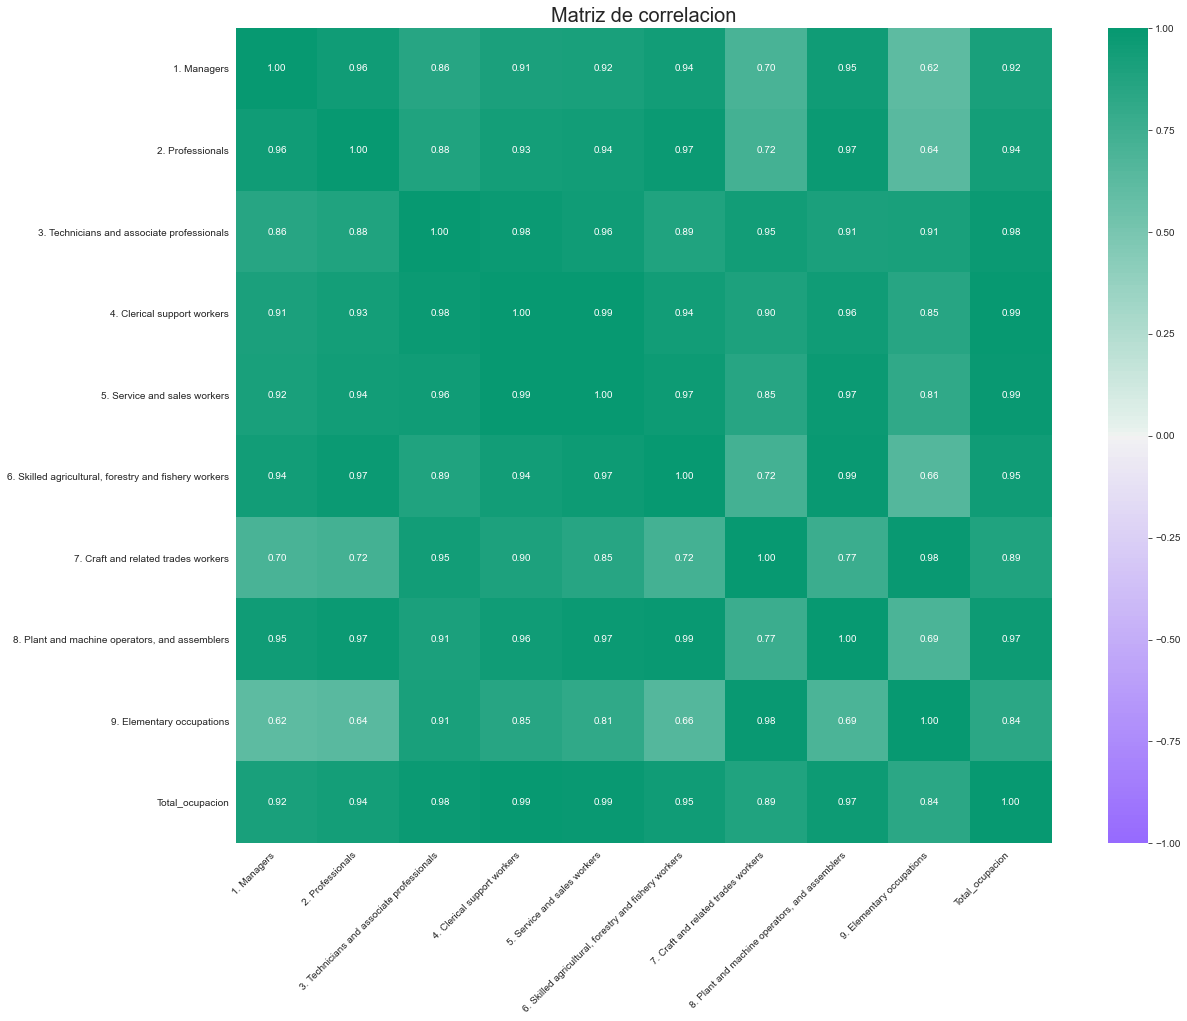

In [447]:
corr = df[['1. Managers', '2. Professionals',
       '3. Technicians and associate professionals',
       '4. Clerical support workers', '5. Service and sales workers',
       '6. Skilled agricultural, forestry and fishery workers',
       '7. Craft and related trades workers',
       '8. Plant and machine operators, and assemblers',
       '9. Elementary occupations', 'Total_ocupacion']].corr()
f,ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    vmin=-1, vmax=1,
    cmap=sns.diverging_palette(274, 155, s=99, l=56, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_title('Matriz de correlacion',fontsize=20);

In [401]:
df.columns

Index(['country', 'Population', 'Region',
       'Est. prevalence of population in modern slavery (victims per 1,000 population)',
       'Est. number of people in modern slavery',
       'Factor One Governance Issues ', 'Factor Two Nourishment and Access ',
       'Factor Three Inequality', 'Factor Four Disenfranchised Groups',
       'Factor Five Effects of Conflict',
       'Final overall (normalised, weighted) vulnerability score',
       'Support survivors', '%', 'Criminal justice', '%.1', 'Coordination',
       '%.2', 'NEG Government  complicity (1.4.3)',
       'NEG State-imposed forced labour (1.8.1)', 'Address risk', '%.3',
       'Supply chains', '%.4', 'SUM/104', 'SUM Neg', 'TOTAL', 'Credit rating',
       'time', 'gdp_growth', 'Agriculture', 'Non-agriculture',
       'Total_informal', '1. Managers', '2. Professionals',
       '3. Technicians and associate professionals',
       '4. Clerical support workers', '5. Service and sales workers',
       '6. Skilled agricultural, f

In [415]:
df.loc[df['country'].str.contains("orea")]

,country,Population,Region,"Est. prevalence of population in modern slavery (victims per 1,000 population)",Est. number of people in modern slavery,Factor One Governance Issues,Factor Two Nourishment and Access,Factor Three Inequality,Factor Four Disenfranchised Groups,Factor Five Effects of Conflict,...,Employed covered in the event of work injury,Persons above retirement age receiving a pension,Persons with severe disabilities collecting disability social protection benefits,Poor persons covered by social protection systems,Population covered by at least one social protection benefit,Unemployed receiving unemployment benefits,Vulnerable persons covered by social assistance,unemployment_rate_+15,poverty_rate,youth_nini
0,"Korea, Democratic People's Republic of","25,244,000",Asia and the Pacific,104.6,"2,640,000",87.6,52.0,30.3,32.4,12.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.27,NaN
136,"Korea, Republic of","50,594,000",Asia and the Pacific,1.9,"99,000",33.9,29.4,25.7,33.8,13.4,...,85.2,100.0,24.8,21.4,67.0,41.25,48.9,3.65,0.00,NaN


In [186]:
l_tmp = df_tmp["Country"]
l_tmp2 = df_2["Country"].loc[df_2["Year"]==2016]
x = list(set(l_tmp).symmetric_difference(set(l_tmp2)))
x

['Eswatini',
 'Burkina Faso',
 'Maldives',
 'Brunei Darussalam',
 'Moldova, Republic of',
 'Togo',
 'Uganda',
 'Chad',
 'Jordan',
 'Chile',
 'Saint Lucia',
 'Djibouti',
 'Nepal',
 'Rwanda',
 'Mauritania',
 'Guyana',
 'Tonga',
 'Pakistan',
 'Kyrgyzstan',
 'Benin',
 'Bangladesh',
 'Niger',
 'Gambia',
 "Lao People's Democratic Republic",
 'Argentina',
 'Fiji',
 'Zambia',
 'Senegal',
 'Suriname',
 'Samoa',
 'India',
 'Myanmar',
 'Barbados']

In [21]:
df_2["ref_area.label"].unique()

array(['Angola', 'Albania', 'Argentina', 'Armenia', 'Burundi', 'Benin',
       'Burkina Faso', 'Bangladesh', 'Bosnia and Herzegovina', 'Bolivia',
       'Brazil', 'Barbados', 'Brunei Darussalam', 'Botswana', 'Chile',
       "Côte d'Ivoire", 'Cameroon', 'Congo, Democratic Republic of the',
       'Cook Islands', 'Colombia', 'Comoros', 'Cape Verde', 'Costa Rica',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'Fiji',
       'Georgia', 'Ghana', 'Gambia', 'Guatemala', 'Guyana', 'Honduras',
       'Haiti', 'Indonesia', 'India', 'Jordan', 'Kyrgyzstan', 'Cambodia',
       'Kiribati', "Lao People's Democratic Republic", 'Lebanon',
       'Liberia', 'Saint Lucia', 'Sri Lanka', 'Lesotho',
       'Moldova, Republic of', 'Madagascar', 'Maldives', 'Mexico',
       'Marshall Islands', 'North Macedonia', 'Mali', 'Myanmar',
       'Mongolia', 'Mozambique', 'Mauritania', 'Mauritius', 'Malawi',
       'Namibia', 'Niger', 'Nicaragua', 'Nepal', 'Pakistan', 'Panama',
       'Peru', 'Paraguay'

In [7]:
df_tmp.loc[df_tmp["time"]==2018]

,ref_area.label,indicator.label,source.label,time,obs_value
8,Afghanistan,SDG indicator 8.2.1 - Annual growth rate of ou...,ILO - ILO Modelled Estimates,2018,-1.96
18,Angola,SDG indicator 8.2.1 - Annual growth rate of ou...,ILO - ILO Modelled Estimates,2018,-5.47
28,Albania,SDG indicator 8.2.1 - Annual growth rate of ou...,ILO - ILO Modelled Estimates,2018,-1.72
38,United Arab Emirates,SDG indicator 8.2.1 - Annual growth rate of ou...,ILO - ILO Modelled Estimates,2018,-0.21
48,Argentina,SDG indicator 8.2.1 - Annual growth rate of ou...,ILO - ILO Modelled Estimates,2018,-3.96
...,...,...,...,...,...
2228,Arab League,SDG indicator 8.2.1 - Annual growth rate of ou...,ILO - ILO Modelled Estimates,2018,0.30
2238,Yemen,SDG indicator 8.2.1 - Annual growth rate of ou...,ILO - ILO Modelled Estimates,2018,-2.96
2248,South Africa,SDG indicator 8.2.1 - Annual growth rate of ou...,ILO - ILO Modelled Estimates,2018,-0.52
2258,Zambia,SDG indicator 8.2.1 - Annual growth rate of ou...,ILO - ILO Modelled Estimates,2018,0.88
